In [178]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine


查看数据

In [179]:
wine = load_wine()
wine.data.shape

(178, 13)

In [180]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [181]:
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [182]:
import pandas as pd
wine = pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
wine.columns=['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸','target']
wine


,酒精,苹果酸,灰,灰的碱性,镁,总酚,类黄酮,非黄烷类酚类,花青素,颜色强度,色调,od280/od315稀释葡萄酒,脯氨酸,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


数据划分

In [183]:
wine_feature = wine[['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']]
wine_target = wine['target']
# 注意顺序 X X Y Y
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine_feature,wine_target,train_size=0.7)
Xtrain.shape

(124, 13)

建立模型

In [184]:
clf_model = tree.DecisionTreeClassifier(criterion='entropy')
clf_model = clf_model.fit(Xtrain,Ytrain)
score = clf_model.score(Xtest,Ytest) # 返回运行的准确度accuracy
score

0.9444444444444444

图形化决策树

In [185]:
import os
os.environ["PATH"]+=os.pathsep+'D:/Software/Graphviz2.38/bin/'

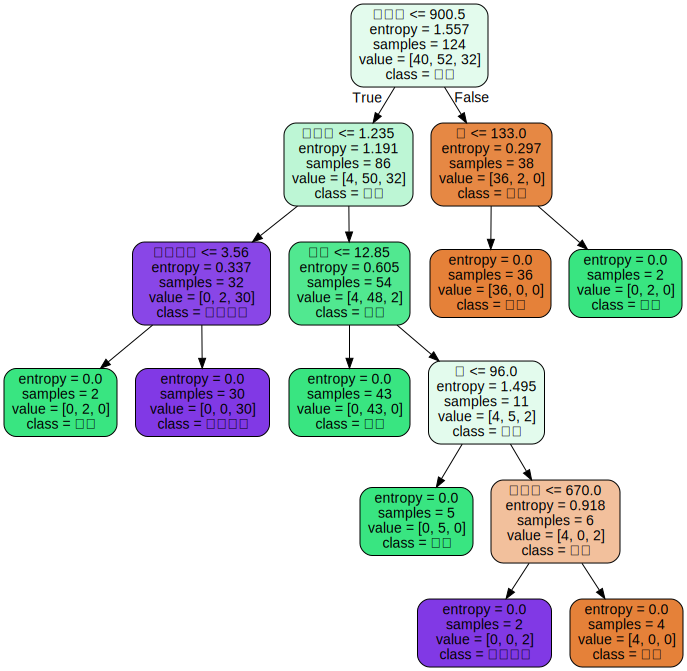

In [186]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz
dot_data = tree.export_graphviz(clf_model,
                                feature_names=feature_name,
                                class_names=['琴酒','雪莉','贝尔摩德'],
                                filled=True, # 填充颜色
                                rounded=True) # 圆角框框
graph = graphviz.Source(dot_data)
graph

In [187]:
# 特征重要性
clf_model.feature_importances_

array([0.08414459, 0.        , 0.        , 0.        , 0.11521209,
       0.        , 0.30559965, 0.        , 0.        , 0.05591784,
       0.        , 0.        , 0.43912583])

In [188]:
# 查看每个特征的重要性
[*zip(feature_name,clf_model.feature_importances_)] # *解包

[('酒精', 0.08414458615283953),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.1152120872193941),
 ('总酚', 0.0),
 ('类黄酮', 0.30559964883594687),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.05591784464419262),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.43912583314762693)]

In [189]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30) # random_state=30固定随机次数
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.9444444444444444

In [190]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=5
                                #   ,splitter="random" 
                                    )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9444444444444444

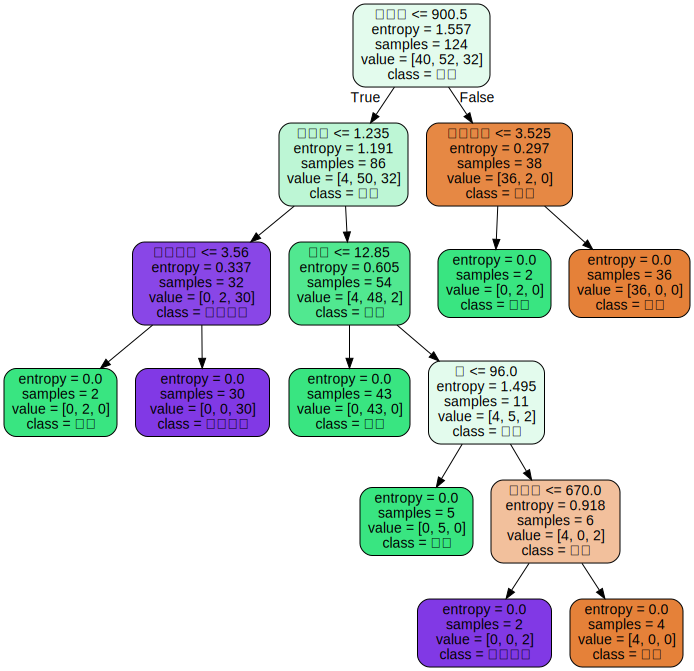

In [191]:
import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

剪枝参数一共5个

In [192]:
#我们的树对训练集的拟合程度如何？
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

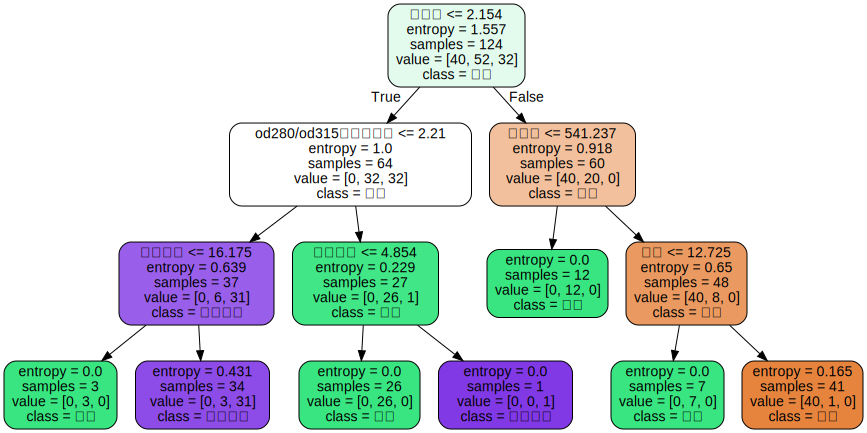

In [193]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    ,max_depth=3
                                 #   ,min_samples_leaf=10 # 分枝后最小样本数必须=>10
                                #    ,min_samples_split=25 # 分枝最小样本数必须=>25
                                    )
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [194]:
score = clf.score(Xtest, Ytest)
score

0.9444444444444444

剪枝参数二   
使用循环来画出参数曲线，选择最优参数

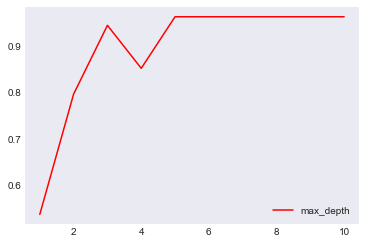

In [195]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

一些接口

In [196]:
clf_model.apply(Xtest) # apply返回每个测试样本所在的叶子节点的索引

array([11,  6,  6, 11,  4,  6,  6, 13, 11,  6, 13,  6,  6,  6,  6,  4,  3,
        4,  4,  8, 10, 13, 13, 10,  4, 11, 13,  4, 11, 13, 13,  8,  6, 13,
        4,  4,  6,  6,  4,  6,  6, 10, 13, 13, 11, 13,  8,  4, 13, 11,  4,
        3,  6,  4], dtype=int64)

In [197]:
clf_model.predict(Xtest) # predict返回每个测试样本的分类/回归结果

array([0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0,
       0, 0, 1, 2, 0, 0, 2, 1, 1, 2])

回归决策树

In [198]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [199]:
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor,boston.data,boston.target,cv=10,scoring='neg_mean_squared_error')
#交叉验证cross_val_score的用法

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targe

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

实例：一维回归的图像绘制

In [200]:
# 可以，讲的很详细，点个赞。就是Y的数据还是太工整了，Y += 0.2 * (0.5 - rng.rand(80)) 会更贴近真实数据一点


In [201]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [202]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80,1), axis=0)
y = np.sin(X).ravel()
y += 0.2 * (0.5 - rng.rand(80))
#y[::5] += 3 * (0.5 - rng.rand(16))
#np.random.rand(数组结构)，生成随机数组的函数


In [203]:

#了解降维函数ravel()的用法
np.random.random((2,1))

np.random.random((2,1)).ravel()

np.random.random((2,1)).ravel().shape

(2,)

In [204]:
y.shape

(80,)

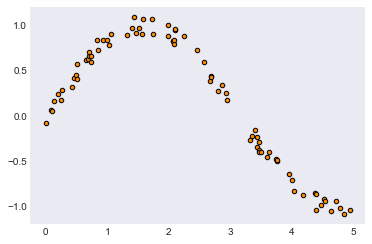

In [205]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")

In [206]:
reg1 = DecisionTreeRegressor(max_depth=3)
reg2 = DecisionTreeRegressor(max_depth=5)
reg1.fit(X,y)
reg2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [207]:
# 创建测试集
Xtest = np.arange(0,5,0.01).reshape(500,1)

In [208]:
y1 = reg1.predict(Xtest) # 预测


In [209]:
y2 = reg2.predict(Xtest)

In [210]:
#y2 = reg1.predict([[2.3,]])
#y2

可视化

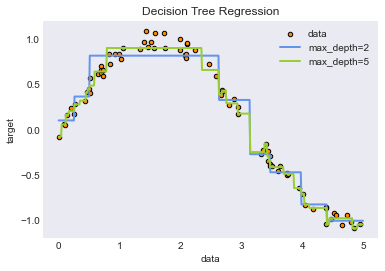

In [211]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(Xtest, y1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(Xtest, y2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [212]:
DecisionTreeClassifier(criterion="gini",
                 splitter="best",
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 min_weight_fraction_leaf=0.,
                 max_features=None,
                 random_state=None,
                 max_leaf_nodes=None,
                 min_impurity_decrease=0.,
                 min_impurity_split=None,
                 class_weight=None,
                 presort=False)

参数含义：
1.criterion:string, optional (default="gini")
            (1).criterion='gini',分裂节点时评价准则是Gini指数。
            (2).criterion='entropy',分裂节点时的评价指标是信息增益。
2.max_depth:int or None, optional (default=None)。指定树的最大深度。
            如果为None，表示树的深度不限。直到所有的叶子节点都是纯净的，即叶子节点
            中所有的样本点都属于同一个类别。或者每个叶子节点包含的样本数小于min_samples_split。
3.splitter:string, optional (default="best")。指定分裂节点时的策略。
           (1).splitter='best',表示选择最优的分裂策略。
           (2).splitter='random',表示选择最好的随机切分策略。
4.min_samples_split:int, float, optional (default=2)。表示分裂一个内部节点需要的做少样本数。
           (1).如果为整数，则min_samples_split就是最少样本数。
           (2).如果为浮点数(0到1之间)，则每次分裂最少样本数为ceil(min_samples_split * n_samples)
5.min_samples_leaf: int, float, optional (default=1)。指定每个叶子节点需要的最少样本数。
           (1).如果为整数，则min_samples_split就是最少样本数。
           (2).如果为浮点数(0到1之间)，则每个叶子节点最少样本数为ceil(min_samples_leaf * n_samples)
6.min_weight_fraction_leaf:float, optional (default=0.)
           指定叶子节点中样本的最小权重。
7.max_features:int, float, string or None, optional (default=None).
           搜寻最佳划分的时候考虑的特征数量。
           (1).如果为整数，每次分裂只考虑max_features个特征。
           (2).如果为浮点数(0到1之间)，每次切分只考虑int(max_features * n_features)个特征。
           (3).如果为'auto'或者'sqrt',则每次切分只考虑sqrt(n_features)个特征
           (4).如果为'log2',则每次切分只考虑log2(n_features)个特征。
           (5).如果为None,则每次切分考虑n_features个特征。
           (6).如果已经考虑了max_features个特征，但还是没有找到一个有效的切分，那么还会继续寻找
           下一个特征，直到找到一个有效的切分为止。
8.random_state:int, RandomState instance or None, optional (default=None)
           (1).如果为整数，则它指定了随机数生成器的种子。
           (2).如果为RandomState实例，则指定了随机数生成器。
           (3).如果为None，则使用默认的随机数生成器。
9.max_leaf_nodes: int or None, optional (default=None)。指定了叶子节点的最大数量。
           (1).如果为None,叶子节点数量不限。
           (2).如果为整数，则max_depth被忽略。
10.min_impurity_decrease:float, optional (default=0.)
         如果节点的分裂导致不纯度的减少(分裂后样本比分裂前更加纯净)大于或等于min_impurity_decrease，则分裂该节点。
         加权不纯度的减少量计算公式为：
         min_impurity_decrease=N_t / N * (impurity - N_t_R / N_t * right_impurity
                            - N_t_L / N_t * left_impurity)
         其中N是样本的总数，N_t是当前节点的样本数，N_t_L是分裂后左子节点的样本数，
         N_t_R是分裂后右子节点的样本数。impurity指当前节点的基尼指数，right_impurity指
         分裂后右子节点的基尼指数。left_impurity指分裂后左子节点的基尼指数。
11.min_impurity_split:float
         树生长过程中早停止的阈值。如果当前节点的不纯度高于阈值，节点将分裂，否则它是叶子节点。
         这个参数已经被弃用。用min_impurity_decrease代替了min_impurity_split。
12.class_weight:dict, list of dicts, "balanced" or None, default=None
         类别权重的形式为{class_label: weight}
         (1).如果没有给出每个类别的权重，则每个类别的权重都为1。
         (2).如果class_weight='balanced'，则分类的权重与样本中每个类别出现的频率成反比。
         计算公式为：n_samples / (n_classes * np.bincount(y))
         (3).如果sample_weight提供了样本权重(由fit方法提供)，则这些权重都会乘以sample_weight。
13.presort:bool, optional (default=False)
        指定是否需要提前排序数据从而加速训练中寻找最优切分的过程。设置为True时，对于大数据集
        会减慢总体的训练过程；但是对于一个小数据集或者设定了最大深度的情况下，会加速训练过程。

SyntaxError: invalid character '：' (U+FF1A) (1489266797.py, line 15)